In [150]:
import numpy as np
import calendar

import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast 
df = pd.read_csv(r"C:\Users\homeA\Desktop\Python - Youtube\data_jobs.csv")

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df = df.dropna(subset='job_skills')                ## Dropping NaN values
df = df.dropna(subset='salary_year_avg')                ## Dropping NaN values
# df = df.dropna()
# df = df.explode('job_skills')

def clean_list(skill):                       
    return ast.literal_eval(skill)                  ## it runs this and changes String to the List data Type
df['job_skills'] = df['job_skills'].apply(clean_list)



In [166]:
df_us = df[(df['job_country']=='United States') & (df['job_title_short']=='Data Analyst')].copy()

df_us = df_us.explode('job_skills')

df_us_group = df_us.groupby('job_skills')['salary_year_avg'].agg(['count','median'])            ## Totally new learning


## Top Pay
df_top_pay = df_us_group.sort_values(by='median', ascending=False).head(10)
# df_top_pay


## Top Skills

df_top_skill = df_us_group.sort_values(by='count',ascending=False).head(10).sort_values(by='median', ascending=False)
# df_top_skill




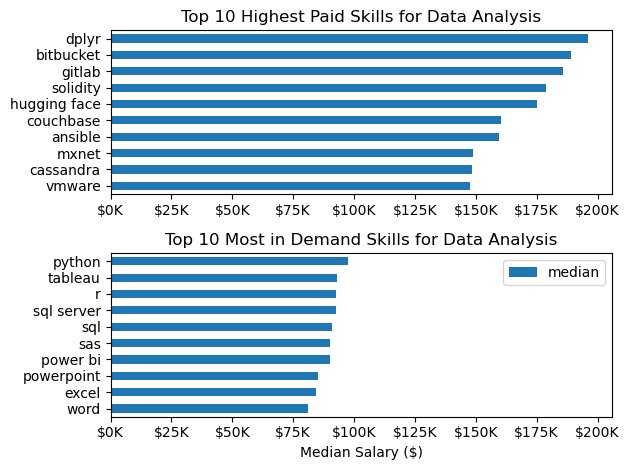

In [190]:
fig, ax = plt.subplots(2,1)

df_top_pay[::-1].plot(kind='barh',y='median',ax=ax[0],legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysis')
ax[0].set_ylabel('')
ax[0].set_xlabel('')


df_top_skill[::-1].plot(kind='barh',y='median',ax=ax[1])
ax[1].set_title('Top 10 Most in Demand Skills for Data Analysis')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($)')


ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())
plt.tight_layout()


plt.show()


# Above is Luke's Method
# Below is my method of Execution 


In [168]:
df_usa = df[(df['job_country']=='United States') & (df['job_title_short']=='Data Analyst')].copy()

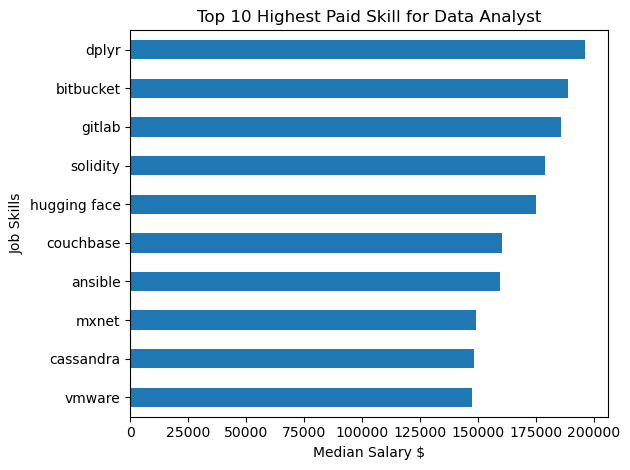

In [169]:
df_usa = df_usa.explode('job_skills')
# df_usa

most_paid_skill=df_usa.groupby('job_skills')['salary_year_avg'].median().sort_values(ascending=False).head(10)
most_paid_skill.plot(kind='barh')
plt.gca().invert_yaxis()
plt.xlabel('Median Salary $')
plt.ylabel('Job Skills')
plt.title('Top 10 Highest Paid Skill for Data Analyst')
plt.tight_layout()
plt.show()


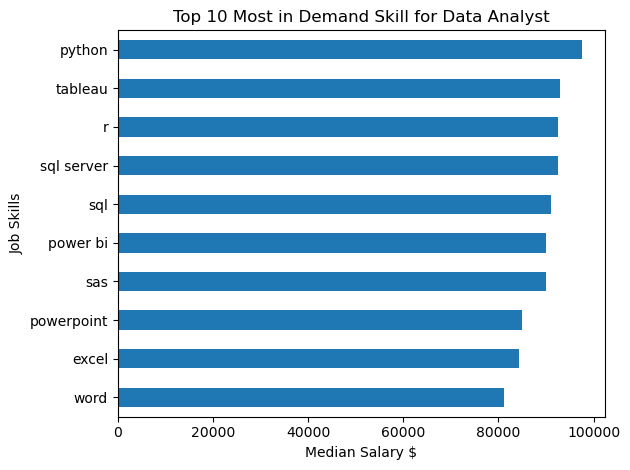

In [170]:

df_usa = df[(df['job_country']=='United States') & (df['job_title_short']=='Data Analyst')].copy()

df_usa = df_usa.explode('job_skills')

df_usa_skill = df_usa['job_skills'].value_counts().sort_values(ascending=False).head(10).index

df_usa = df_usa[df_usa['job_skills'].isin(df_usa_skill)].copy()

df_usa.groupby(['job_skills'])['salary_year_avg'].median().sort_values(ascending=False).plot(kind='barh')

plt.gca().invert_yaxis()
plt.xlabel('Median Salary $')
plt.ylabel('Job Skills')
plt.title('Top 10 Most in Demand Skill for Data Analyst')
plt.tight_layout()
plt.show()




In [ ]:
# most_demand_skill

job_skills
python        97500.00
tableau       92875.00
r             92500.00
sql server    92500.00
sql           91000.00
power bi      90000.00
sas           90000.00
powerpoint    85000.00
excel         84392.00
word          81194.75
Name: salary_year_avg, dtype: float64

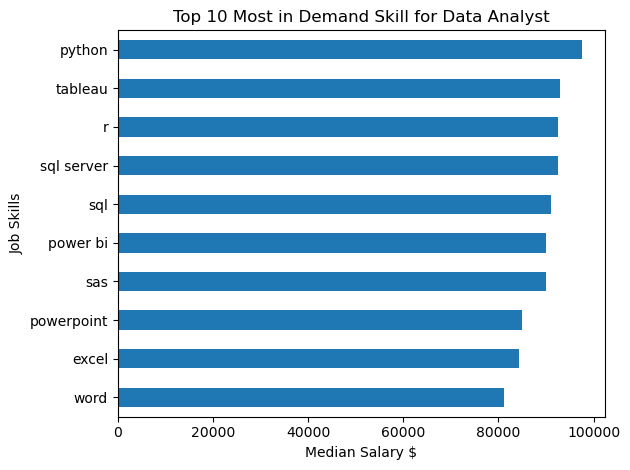

In [156]:
## Here the extra effort we have to did was that first we had to extract the most frequent number of jobs from the main 
## Dataframe and take its index and then make a new dataframe that only has that top 10 skills

df = df.explode('job_skills')
df_usa = df[(df['job_country']=='United States') & (df['job_title_short']=='Data Analyst')].copy()

top_skills = df_usa['job_skills'].value_counts().sort_values(ascending=False).head(10).index



df_usa_skill = df_usa[df_usa['job_skills'].isin(top_skills)].copy()

most_demand_skill =df_usa_skill.groupby('job_skills')['salary_year_avg'].median().sort_values(ascending=False)

most_demand_skill.plot(kind='barh')
# df_usa.groupby('job_skills')['salary_year_avg'].median().sort_values(ascending=False).head(10)
plt.gca().invert_yaxis()
plt.xlabel('Median Salary $')
plt.ylabel('Job Skills')
plt.title('Top 10 Most in Demand Skill for Data Analyst')
plt.tight_layout()
plt.show()


<Axes: ylabel='job_skills'>

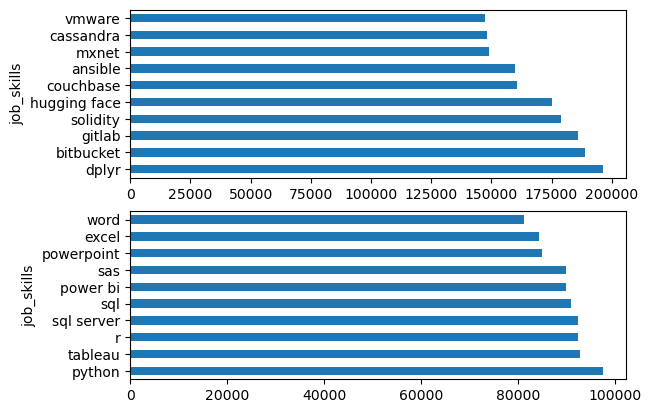

In [176]:
fig, ax = plt.subplots(2,1)
plt.gca().invert_yaxis()
most_paid_skill.plot(kind='barh',y='median',ax=ax[0])
plt.gca().invert_yaxis()
most_demand_skill.plot(kind='barh',y='median',ax=ax[1])

